# Банки - анализ оттока клиентов

### Описание проекта

Всем привет и добро пожаловать в один из лучших банков страны «Метанпромбанк»!🏦


Наш банк в срочном порядке ищет аналитиков уверенным владением «Python». Вашей главной задачей станет анализ оттока клиентов. Анализ покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка.
«Метанпромбанк» — деньги не пахнут!

### Задача проекта

Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

### Этапы проекта

- [Загрузка датасета и изучение общей информации](#download)
- [Предобработка данных](#preprocessing) 
    - Исследовать пропущенные значения
    - Исследовать соответствие типов
    - Исследовать дубликаты
    - Проверить корректность наименований колонок
    - Переименовать колонки
    - Удалить дубликаты
    - Привести типы
    - Заменить пропущенные значения
- [Исследовательский анализ данных](#analysis)
    - Вычисление процента ушедших клиентов по каждому признаку
    - Построение корреляционных матриц для выявление закономерностей
- [Выделить портреты клиентов, которые склонны уходить из банка](#segments)
    - Комбинирование признаков для выделения сегментов
- [Сформулировать и проверить статистические гипотезы](#hypothesis)
    - Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались
    - Проверить гипотезу различия дохода между мужчинами и женщинами
- [Презентация](#presentation)
    - Оформление главных выводов и представление сегментов клиентов
- [Дашборд](#dashboard)
    - Диаграмма, отражающая количество клиентов в зависимости от числа используемых продуктов
    - Индикатор процента ушедших клиентов
    - Фильтр дашборда по городу

### Загрузка датасета и изучение общей информации
<a id='download'></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import phik
from phik.report import plot_correlation_matrix

In [47]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
data = pd.read_csv(path)
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


Ну здравствуйте, клиенты. По первому взгляду на датасет нужно будет: изменить название некоторых колонок, тип данных в столбце "score"<br>Пропуски имеем только в столбце "balance"

### Предобработка данных
<a id='preprocessing'></a>

**Посмотрим на пропуски**

In [49]:
data[data['balance'].isna()]['churn'].value_counts()

0    2282
1      13
Name: churn, dtype: int64

In [56]:
data[(data['balance'].isna())&(data['churn']==1)]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1273,136567,961.0,Ярославль,М,31,0,NaN,1,1,0,1015386.14,1
1400,146876,707.0,Ярославль,М,24,0,NaN,3,1,0,94091.11,1
3017,123230,980.0,Рыбинск,Ж,53,0,NaN,1,1,1,327646.02,1
4118,157443,727.0,Ростов,М,33,0,NaN,1,1,0,132546.93,1
4302,167482,955.0,Ярославль,М,62,0,NaN,1,1,0,157784.96,1
5578,136508,739.0,Рыбинск,М,49,0,NaN,2,1,1,280945.17,1
6827,205707,953.0,Ярославль,М,30,0,NaN,3,1,0,157069.20,1
7572,144559,748.0,Ярославль,М,45,0,NaN,1,1,0,288756.23,1
8185,116284,743.0,Ярославль,М,48,0,NaN,1,1,1,634457.21,1
8611,195981,763.0,Ярославль,Ж,48,0,NaN,1,1,0,248232.39,1


Пропуски в столбце "balance" преимущественно у тех клиентов, которые ушли.<br>
Можем предположить, что ушедшие сняли деньги со счета. Это логично.<br>
Тогда заменим пропуски нулями

In [6]:
data['balance'] = data['balance'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        10000 non-null  float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


Ни одного пропуска, красота!

**Проверим типы данных**

In [7]:
data['score'].unique()

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

В столбце "score" нет дробных чисел, тип данных float тут ни к чему.<br>
Заменим тип данных на integer

In [8]:
data['score'] = data['score'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  int32  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        10000 non-null  float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 898.6+ KB


Больше проблем с типами данных нет

**Проверим дубликаты**

In [9]:
data.duplicated().sum()

1

Опа, попался. Есть один дубликат в данных. Удалим его

In [10]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9999 non-null   int64  
 1   score          9999 non-null   int32  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        9999 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  EST_SALARY     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 976.5+ KB


Дубликаты удалены, двигаемся дальше!

**Изменим названия колонок**

In [11]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [12]:
data = data.rename(columns={'USERID' : 'user_id', 'EST_SALARY' : 'est_salary'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   int32  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        9999 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 976.5+ KB


Названия столбцов теперь удобны для работы

**Исследуем аномалии**

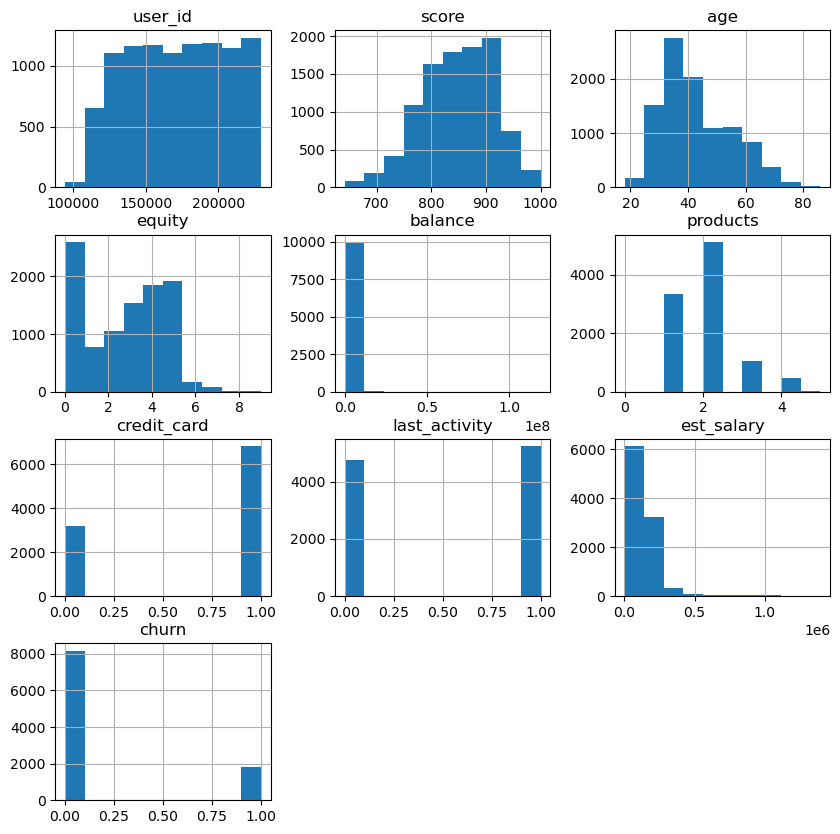

In [13]:
data.hist(figsize=(10,10))
plt.show()

У клиентов нашего банка не может быть 0 продуктов.

In [14]:
data['products'].value_counts()

2    5108
1    3340
3    1046
4     474
5      30
0       1
Name: products, dtype: int64

Такой человек всего один, поэтому удалим эти данные

In [15]:
data = data.query('products>0')

На этом этап предобработки данных закончен. Наш датасет готов для качественного исследовательского анализа

### Исследовательский анализ данных
<a id='analysis'></a>

Нам необходимо выделить признаки, которые влияют на отток клиентов.<br>
Построим графики зависимости оттока клиентов от признаков 

**Для начала помотрим на корреляцию колличественных признаков и оттока клиентов**

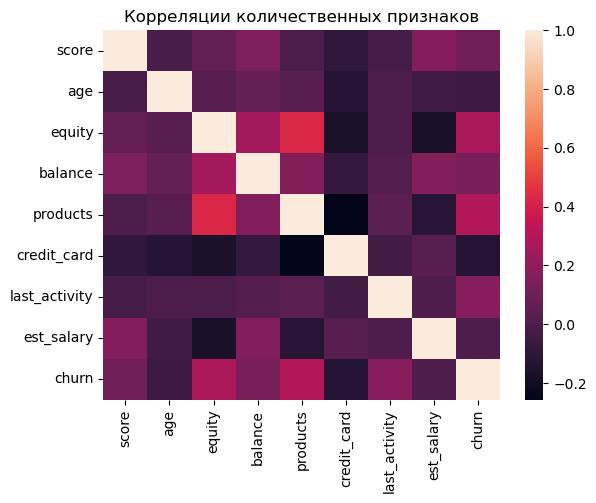

In [16]:
corr = data.drop(columns=['user_id', 'city', 'gender'], axis=1).corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Корреляции количественных признаков')
plt.show()

Отсюда видим, что признаки "equity" и "products" имеют сильную корреляцию с "churn".<br>
А вот возраст и доход, оказывается, не слишком влияют на отток клиентов

Посмотрим на корреляции методом Phik

In [17]:
phik_overview = data.phik_matrix()

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


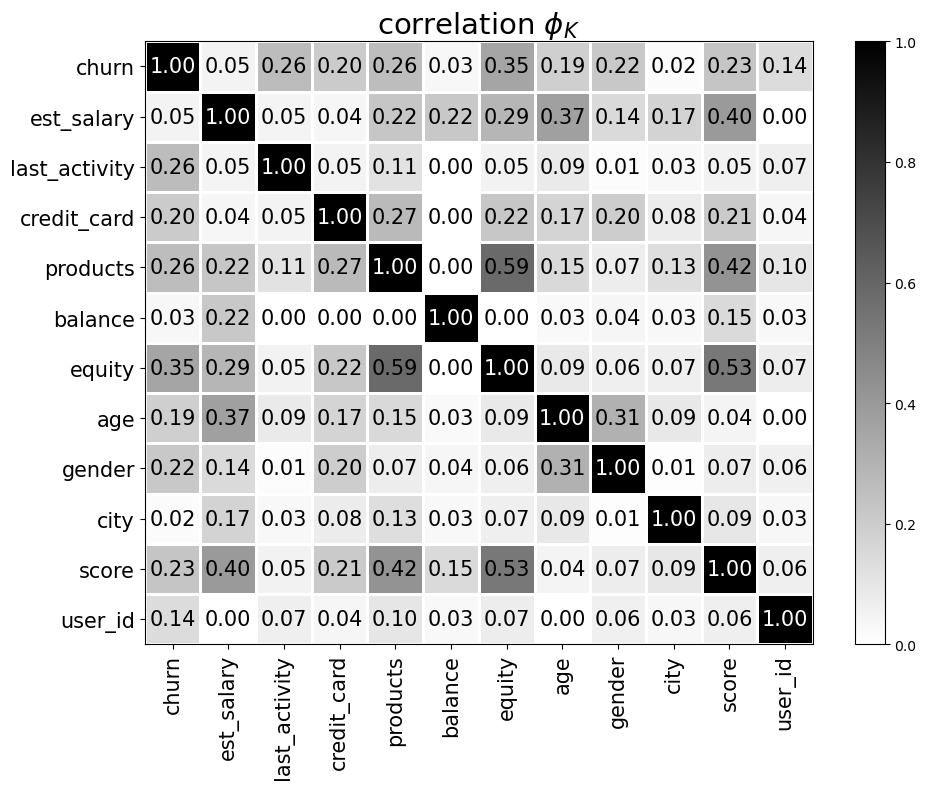

In [18]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='gist_yarg', 
                        title=r'correlation $\phi_K$', 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Отсюда видим, что еще и гендер имеет значительную корреляцию с churn

In [19]:
pivot = pd.pivot_table(data=data, index='equity', columns='churn', values='user_id', aggfunc='count').rename(
           columns={0:'count_remain', 1:'count_left'})
pivot['%_of_left'] = round(pivot['count_left']*100/(pivot['count_left']+pivot['count_remain']),2)
pivot

churn,count_remain,count_left,%_of_left
equity,,,
0,2501,90,3.47
1,681,93,12.02
2,886,166,15.78
3,1220,322,20.88
4,1385,465,25.14
5,1341,577,30.08
6,103,58,36.02
7,43,37,46.25
8,11,6,35.29


In [20]:
def draw_plot(pivot, param):
    plt.plot(pivot.index.tolist(), pivot['%_of_left'])
    plt.xlabel(param)
    plt.ylabel('Процент')
    plt.title(f'Процент ушедших клиентов в зависимости от {param}')
    plt.show()

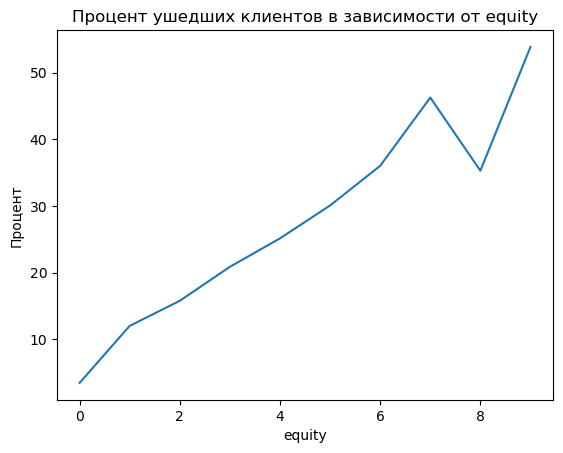

In [21]:
draw_plot(pivot, 'equity')

C ростом оценки собственности увеличивается процент ушедших

In [22]:
pivot = pd.pivot_table(data=data, index='products', columns='churn', values='user_id', aggfunc='count').rename(
           columns={0:'count_remain', 1:'count_left'})
pivot['%_of_left'] = round(pivot['count_left']*100/(pivot['count_left']+pivot['count_remain']),2)
pivot

churn,count_remain,count_left,%_of_left
products,,,
1,3105,235,7.04
2,4129,979,19.17
3,748,298,28.49
4,174,300,63.29
5,21,9,30.00


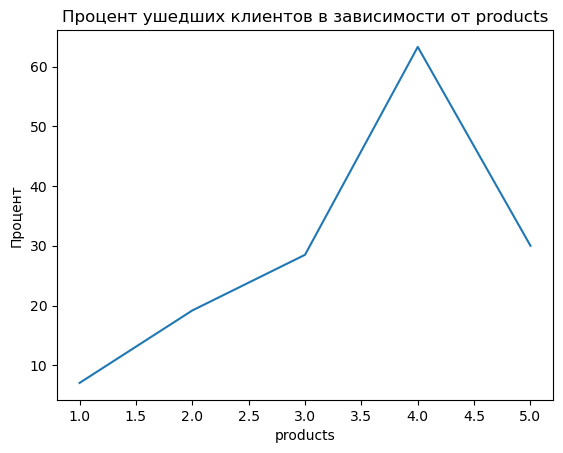

In [23]:
draw_plot(pivot, 'products')

С ростом количества продуктов увеличивается процент ушедших, упадок только у 5 продуктов, но там всего 30 клиентов.

In [24]:
pivot = pd.pivot_table(data=data, index='equity', values='products', aggfunc='mean').rename(
           columns={'products' : 'mean_products'})
pivot

,mean_products
equity,
0,1.269780
1,1.811370
2,2.000000
3,2.047990
4,2.135676
5,2.189260
6,2.347826
7,2.325000
8,2.411765


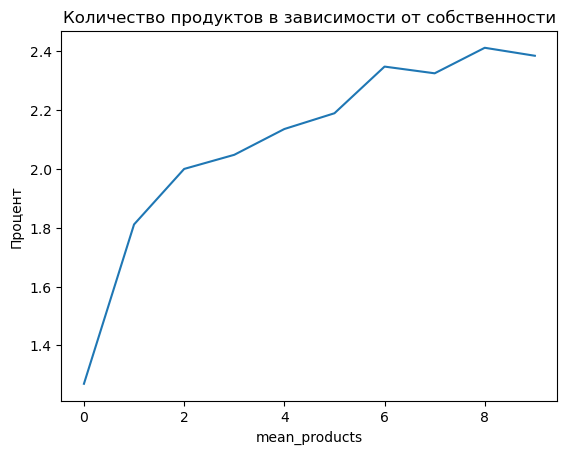

In [25]:
plt.plot(pivot.index.tolist(), pivot['mean_products'])
plt.xlabel('mean_products')
plt.ylabel('Процент')
plt.title('Количество продуктов в зависимости от собственности')
plt.show()

С ростом оценки собственности растет среднее количество продуктов, что показывает положительную корреляцию как в матрице корреляций

**Качественные признаки**

Посмотрим, какой процент клиентов уходит в разбивке по гендеру и городам

In [26]:
pivot = pd.pivot_table(data=data, index=['city', 'gender'], columns='churn', values='user_id', aggfunc='count').rename(\
        columns={0:'count_remain', 1:'count_left'}).reset_index()
pivot['%_of_left'] = round(pivot['count_left']*100/(pivot['count_left']+pivot['count_remain']),2)
pivot

churn,city,gender,count_remain,count_left,%_of_left
0,Ростов,Ж,652,92,12.37
1,Ростов,М,510,177,25.76
2,Рыбинск,Ж,1222,134,9.88
3,Рыбинск,М,1009,297,22.74
4,Ярославль,Ж,2480,411,14.22
5,Ярославль,М,2304,710,23.56


Во всех городах мужчины уходят чаще, чем женщины.<br>
Проценты ушедших примерно равны в разбивке по городам

**Комбинации признаков**

Проанализируем подробнее. Будем строить графики разброса по всем возможным комбинациям количественных и качественных признаков

In [27]:
sns.set_palette(sns.color_palette("blend:#6A6A6A,#B8B7BC", n_colors=2))

In [28]:
category_features = ['city', 'gender', 'credit_card', 'last_activity']
numeric_features = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

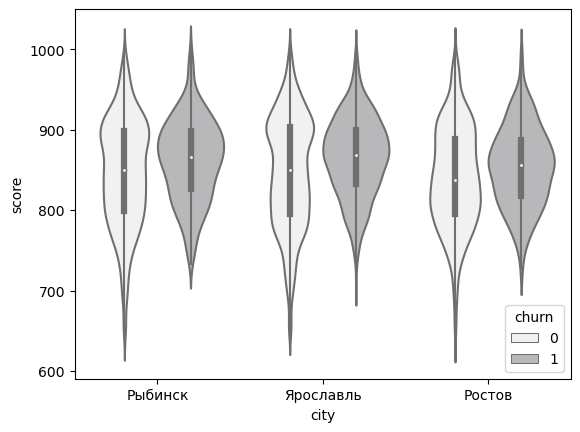

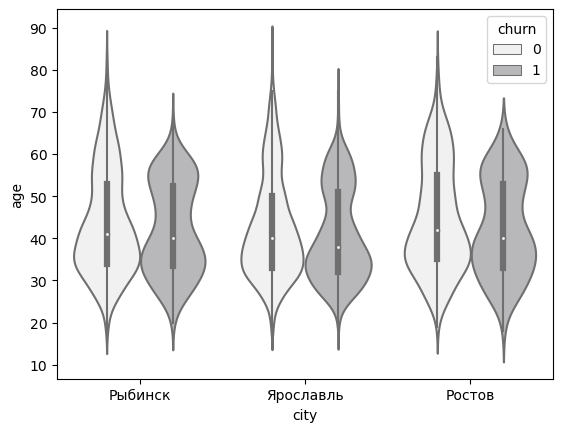

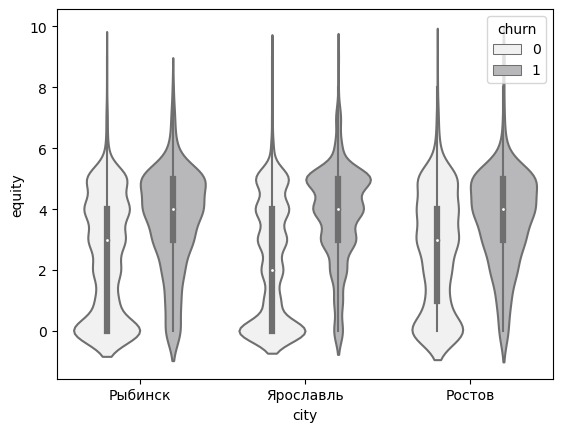

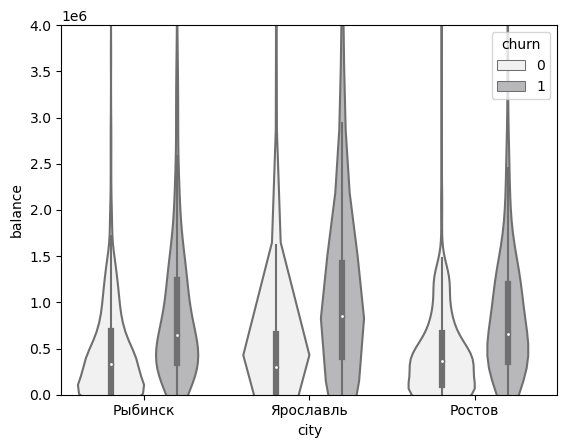

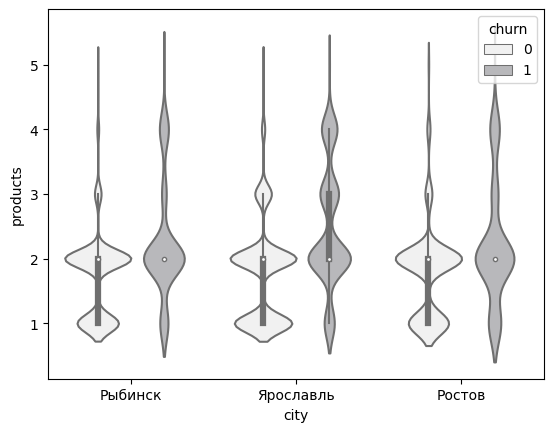

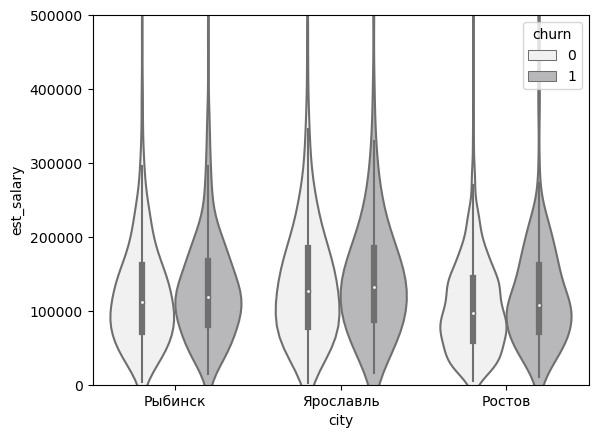

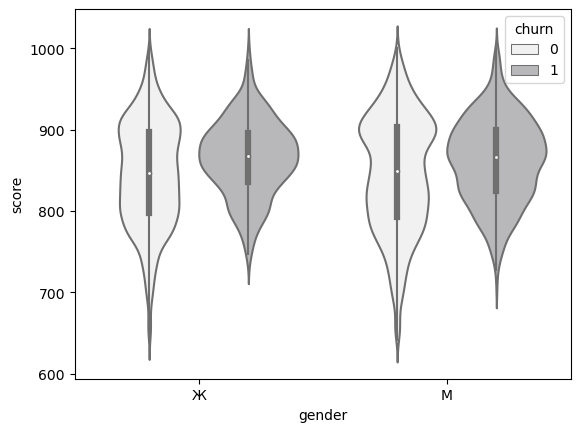

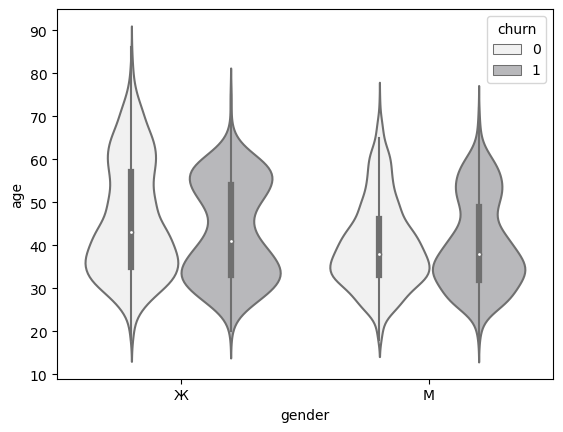

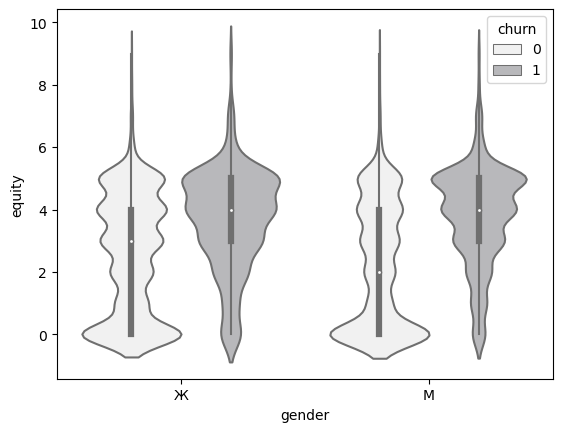

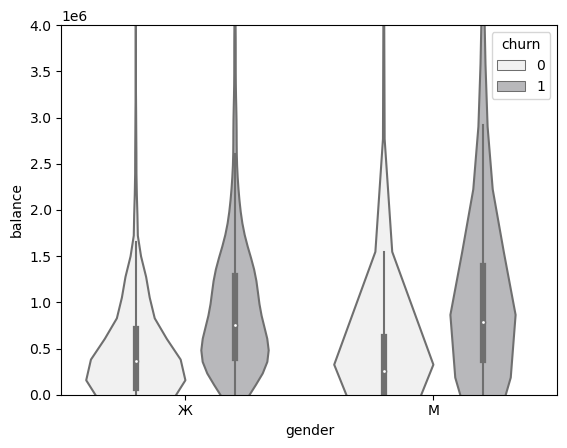

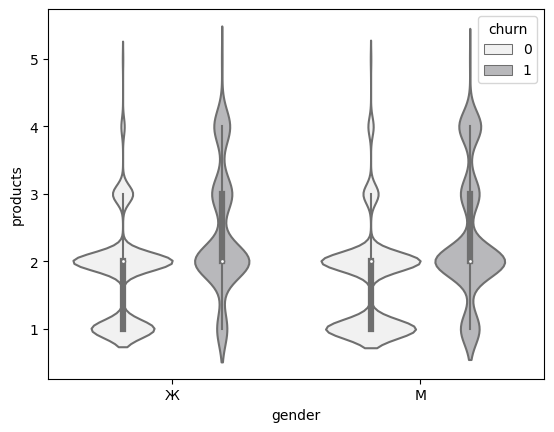

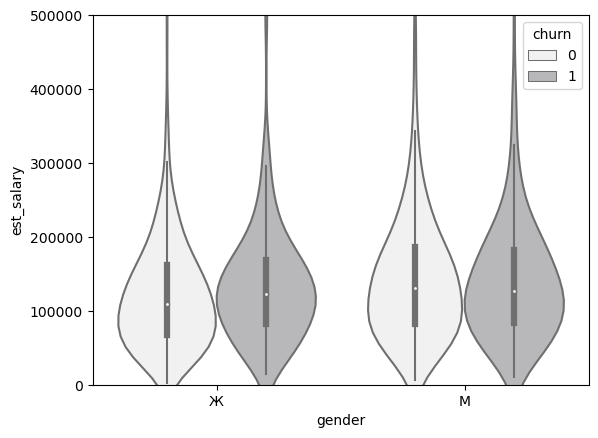

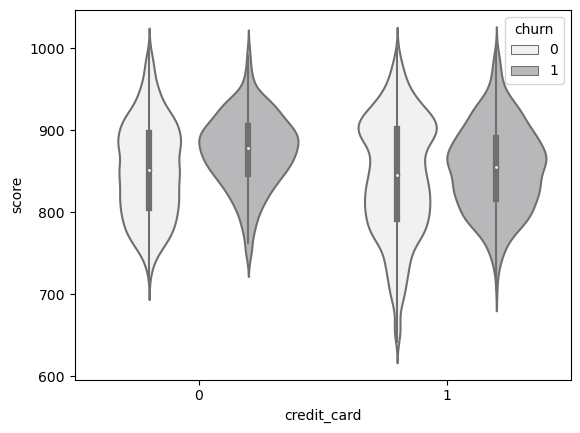

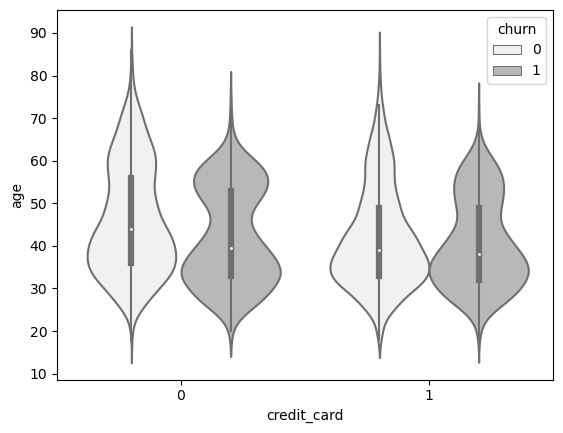

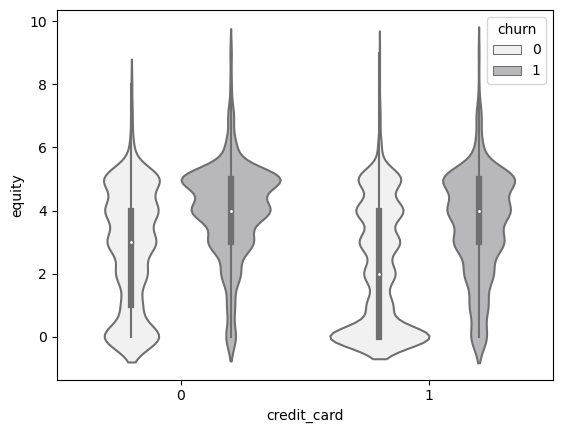

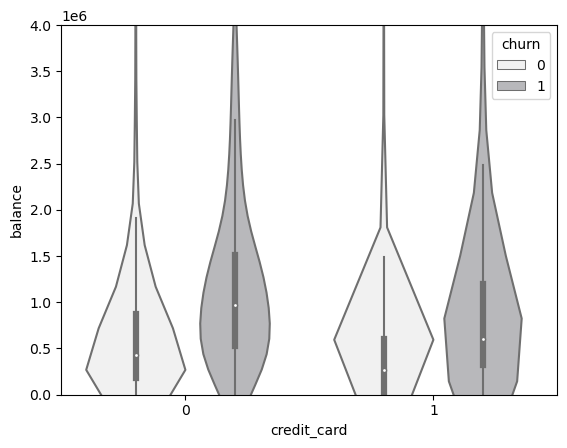

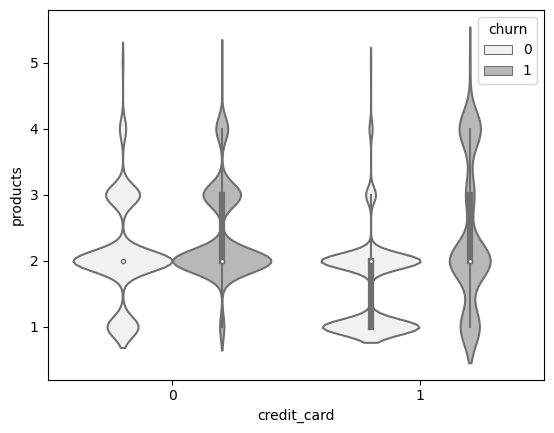

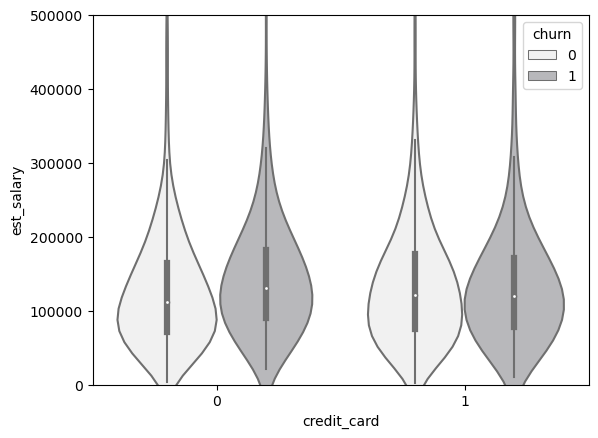

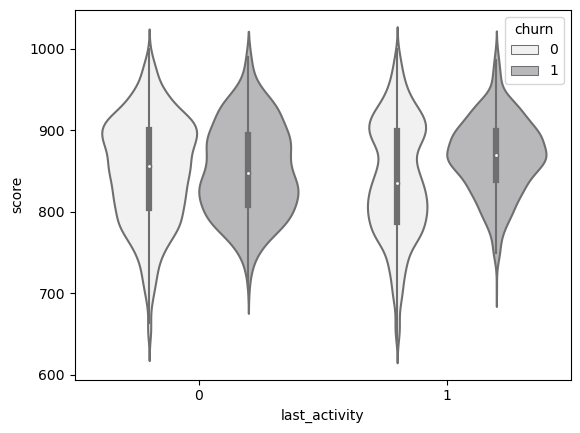

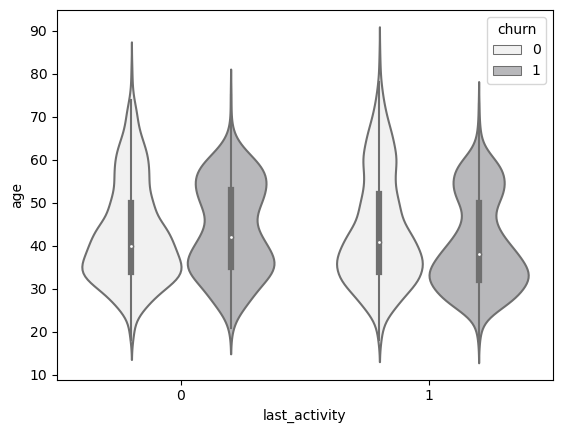

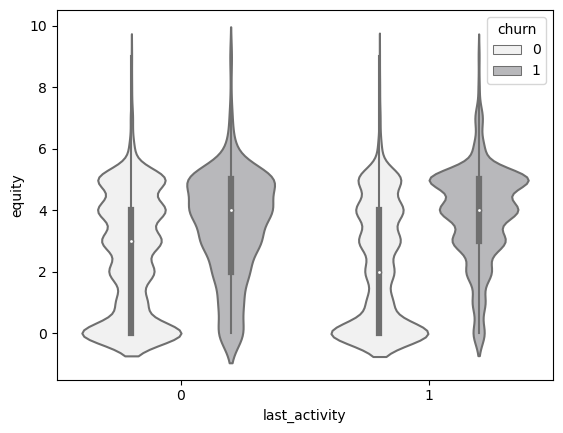

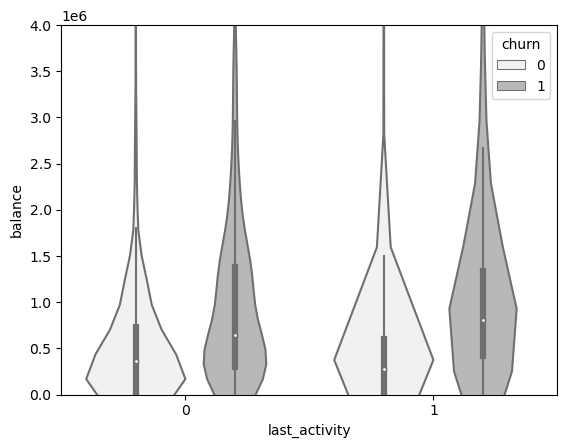

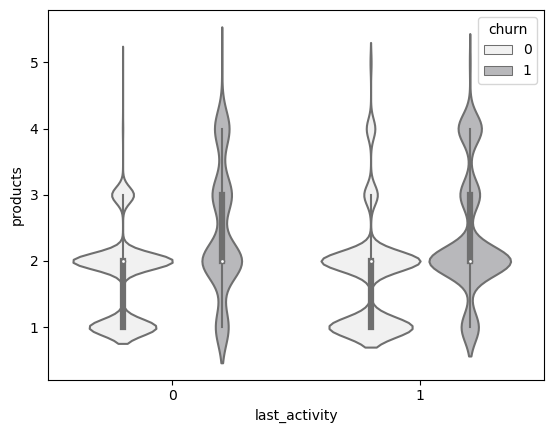

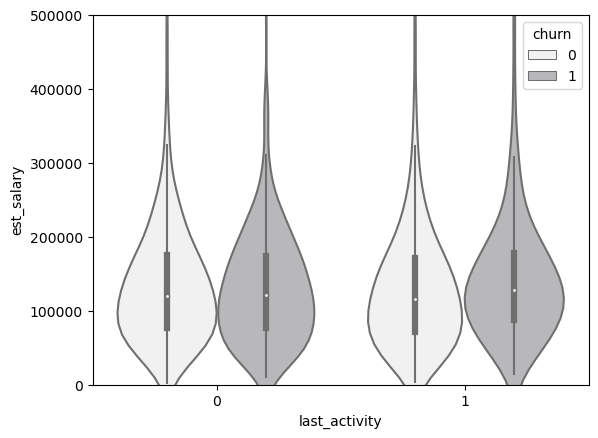

In [29]:
for category in category_features:
    for num in numeric_features:
        sns.violinplot(data = data, x=category, y=num, hue='churn', color ='#B8B7BC')
        if num == 'balance':
            plt.ylim(0,4000000)
        elif  num == 'est_salary':
            plt.ylim(0,500000)
        plt.show()

Выводы из графиков:
- По всем городам клиенты с капиталом 3 и более склонны покидать наш банк
- По всем городам клиенты с 4 продуктами и более склонны покидать наш банк
- Среди тех, кто проявлял активность в последнее время, наш банк покидает большое количество клиентов с score от 850 до 900
- Клиенты с балансом более 500 тыс. руб слонны покидать наш банк


Графики дали нам понять, что банк плохо работает на удержание более обеспеченных клиентов.

### Выделение сегментов
<a id='segments'></a>

Исследовательский анализ показал нам, что уходящие клиенты описываются следующими признаками: <br>

**Сегмент 1**
- Продуктов банка 3 и более
- Есть кредитная карта
- Score клиента более 850
- Баланс на счете 500 тыс. руб и более

**Сегмент 2**
- Проявляли активность в последнее время
- Score клиента более 850
- Баланс на счете 500 тыс. руб и более

**Сегмент 3**
- Оценка собственности 4 и более
- Продуктов банка 3 и более
- Мужчины

Представленные сегменты покидают банк больше всего. Проанализируем их

In [30]:
segment1 = data.loc[(data['products']>=3)&(data['score']>=850)& (data['balance']>=500000)&(data['credit_card']==1)]
churn = round(segment1['churn'].sum()*100/len(segment1), 2)
print(f'Процент ушедших клиентов в первом сегменте равен {churn}')
print(f'А всего клиентов {len(segment1)}')

Процент ушедших клиентов в первом сегменте равен 70.2
А всего клиентов 245


In [31]:
segment2 = data.loc[(data['balance']>=500000) & (data['score']>=850) &(data['last_activity']==1)]   
churn = round(segment2['churn'].sum()*100/len(segment2),2)
print(f'Процент ушедших клиентов в первом сегменте равен {churn}')
print(f'А всего клиентов {len(segment2)}')

Процент ушедших клиентов в первом сегменте равен 57.74
А всего клиентов 1202


In [32]:
segment3 = data.loc[(data['equity']>=3)&(data['gender']=='М')&(data['products']>=3)]
churn = round(segment3['churn'].sum()*100/len(segment3), 2)
print(f'Процент ушедших клиентов в первом сегменте равен {churn}')
print(f'А всего клиентов {len(segment3)}')

Процент ушедших клиентов в первом сегменте равен 53.46
А всего клиентов 621


In [33]:
s1 = segment1[segment1['churn']==1]['user_id'].unique().tolist()
s2 = segment2[segment2['churn']==1]['user_id'].unique().tolist()
s3 = segment3[segment3['churn']==1]['user_id'].unique().tolist()

In [34]:
all_churn = s1+s2+s3
all_churn = set(all_churn)

In [35]:
len(all_churn)

928

В общей сумме сегменты покрывают 939 ушедших клиентов. Посмотрим, сколько всего ушедших клиентов

In [36]:
len(data[data['churn']==1])

1821

Таким образом, наши сегменты покрывают около 51% от всех ушедших

In [37]:
len(all_churn)*100/len(data[data['churn']==1])

50.96101043382757

### Гипотезы
<a id='hypothesis'></a>

H0: Нет разницы в доходе между теми клиентами, которые покинули банк и теми, кто остались<br>
H1: Существует разница в доходе между теми клиентами, которые покинули банк и теми, кто остались

Статистическую значимость возьмем 0.05

In [38]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
sample_1 = data[data['churn']==0]['est_salary'].to_list()
sample_2 = data[data['churn']==1]['est_salary'].to_list()

In [39]:
len(sample_1), len(sample_2)

(8177, 1821)

Размеры выборок заметно отличаются. Ограничим sample_1 1821 записью

In [40]:
sample_1 = sample_1[:1820]

In [41]:
results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9404790274035465
Не получилось отвергнуть нулевую гипотезу


Значит уровень дохода никак не влияет на отток клиентов. Это мы увидели при изучении корреляций и убедились статистическим тестом

**Проведем еще один тест**

H0: Нет разницы в доходе между мужчинами и женщинами<br>
H1: Существует разница в доходе между мужчинами и женщинами

In [42]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
sample_1 = data[data['gender']=='М']['est_salary'].to_list()
sample_2 = data[data['gender']=='Ж']['est_salary'].to_list()

In [43]:
len(sample_1), len(sample_2)

(5007, 4991)

Выборки отличаются незначительно, можем проводить тест

In [44]:
results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.726794955440089e-16
Отвергаем нулевую гипотезу


Значит заработная плата клиентов нашего банка зависит от гендера

### Выводы

Была проделана большая работа. Первым делом, мы провели подробную предобработку данных. Здесь исследовали дубликаты, обработали пропуски в данных, разобрались с типами данных. Затем последовал исследовательский анализ данных. Мы посмотрели на корреляционную матрицу количественных признаков, проанализировали категориальные данные и их закономерности. После этого мы начали комбинировать признаки и выявили интересные закономерности. По итогу выяснилось, что наш банк плохо удерживает клиентов с заработной платой от 1 млн, оценкой капитала 3 и выше. На основе этой информации были выделены сегменты уходящих клиентов. На этапе проверки статистических гипотез мы выдвинули две гипотезы о равенсте заработной платы между ушедшими клиентами и оставшимися и между мужчинами и женщинами.

### Презентация
<a id='presentation'></a>

https://drive.google.com/file/d/1_pZH6VXA13G4yHgOfc5P3fiPlm5Vq5BU/view?usp=share_link

### Дашборд
<a id='dashboard'></a>

https://public.tableau.com/app/profile/klim5451/viz/Final_project_16770956839340/Dashboard1?publish=yes